In [1]:
import numpy as np
import matplotlib.pyplot as plt

%precision 3
%matplotlib inline

## 5.1 1차원 이산형 확률변수

### 5.1.1 1차원 이산형 확률변수의 정의

+ 확률질량함수

In [2]:
x_set = np.array([1, 2, 3, 4, 5, 6])

In [3]:
def f(x):
    if x in x_set:
        return x / 21
    else:
        return 0

In [4]:
X = [x_set, f]

In [5]:
# 확률 p_k를 구한다
prob = np.array([f(x_k) for x_k in x_set])

# x_k와 p_k의 대응을 사전식으로 표시
dict(zip(x_set, prob))

{1: 0.047619047619047616,
 2: 0.09523809523809523,
 3: 0.14285714285714285,
 4: 0.19047619047619047,
 5: 0.23809523809523808,
 6: 0.2857142857142857}

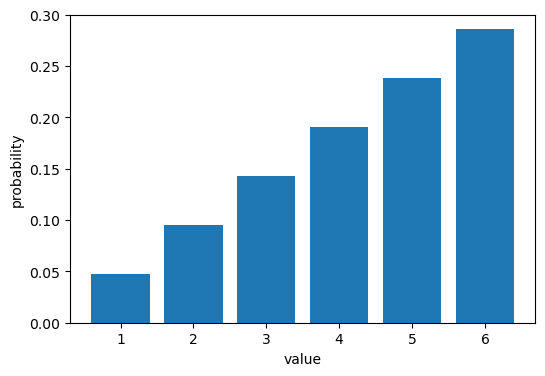

In [6]:
fig = plt.figure(figsize=(6, 4))
ax = fig.add_subplot(111)
ax.bar(x_set, prob)
ax.set_xlabel('value')
ax.set_ylabel('probability')

plt.show()

+ 확률의 성질

In [7]:
np.all(prob>=0)

True

In [8]:
np.sum(prob)

0.9999999999999999

+ 확률변수의 변환

In [9]:
y_set = np.array([2*x_k+3 for x_k in x_set])
prob = np.array([f(x_k) for x_k in x_set])
dict(zip(y_set, prob))

{5: 0.047619047619047616,
 7: 0.09523809523809523,
 9: 0.14285714285714285,
 11: 0.19047619047619047,
 13: 0.23809523809523808,
 15: 0.2857142857142857}

### 5.1.2 1차원 이산형 확률변수의 지표

+ 기댓값

In [10]:
np.sum([x_k * f(x_k) for x_k in x_set])

4.333333333333333

In [11]:
sample = np.random.choice(x_set, int(1e6), p=prob)
np.mean(sample)

4.332247

In [12]:
def E(X, g=lambda x: x):
    x_set, f = X
    return np.sum([g(x_k) * f(x_k) for x_k in x_set])

In [13]:
E(X)

4.333333333333333

In [14]:
E(X, g=lambda x: 2*x + 3)

11.666666666666664

In [15]:
2 * E(X) + 3

11.666666666666666

+ 분산

In [16]:
mean = E(X)
np.sum([(x_k - mean)**2 * f(x_k) for x_k in x_set])

2.2222222222222223

In [17]:
def V(X, g=lambda x: x):
    x_set, f = X
    mean = E(X, g)
    return np.sum([(g(x_k) - mean)**2 * f(x_k) for x_k in x_set])

In [18]:
V(X)

2.2222222222222223

In [19]:
V(X, lambda x: 2*x + 3)

8.88888888888889

In [20]:
2**2 * V(X)

8.88888888888889